# Curneu Problem Statement - 1
### Nikinprasad V R
### 1832038

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#--DATASET DECRIPTION--#
rdata = pd.read_csv(r'D:\#PROJECTS\Curneu\SD03Q016\reported_numbers.csv')
edata = pd.read_csv(r'D:\#PROJECTS\Curneu\SD03Q016\estimated_numbers.csv')
idata = pd.read_csv(r'D:\#PROJECTS\Curneu\SD03Q016\incidence_per_1000_pop_at_risk.csv')

In [3]:
#--EDA--#
print(rdata.head() , rdata.info())
print(edata.head() , edata.info()) 
print(idata.head() , idata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1944 non-null   object 
 1   Year           1944 non-null   int64  
 2   No. of cases   1710 non-null   float64
 3   No. of deaths  1675 non-null   float64
 4   WHO Region     1944 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB
       Country  Year  No. of cases  No. of deaths             WHO Region
0  Afghanistan  2017      161778.0           10.0  Eastern Mediterranean
1      Algeria  2017           0.0            0.0                 Africa
2       Angola  2017     3874892.0        13967.0                 Africa
3    Argentina  2017           0.0            1.0               Americas
4      Armenia  2017           0.0            NaN                 Europe None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data col

In [4]:
def getUnique(df):
    for col in df.columns:
        print(col + " : " + str(df[col].nunique()))

In [5]:
getUnique(rdata)

Country : 108
Year : 18
No. of cases : 1426
No. of deaths : 708
WHO Region : 6


In [6]:
getUnique(edata)

Country : 107
Year : 8
No. of cases : 695
No. of deaths : 519
No. of cases_median : 694
No. of cases_min : 448
No. of cases_max : 481
No. of deaths_median : 447
No. of deaths_min : 255
No. of deaths_max : 336
WHO Region : 6


In [7]:
getUnique(idata)

Country : 107
Year : 19
No. of cases : 1432
WHO Region : 6


In [8]:
reported = rdata.groupby(['WHO Region']).agg({'No. of cases' : 'sum'}).reset_index()
x = rdata['No. of cases'].sum()
reported['Percentage'] = (reported['No. of cases']/x)*100
reported

,WHO Region,No. of cases,Percentage
0,Africa,586002159.0,87.930388
1,Americas,13894342.0,2.084864
2,Eastern Mediterranean,19932663.0,2.990922
3,Europe,112675.0,0.016907
4,South-East Asia,39468640.0,5.922321
5,Western Pacific,7028251.0,1.054598


Text(0.5, 1.0, 'In other WHO Regions')

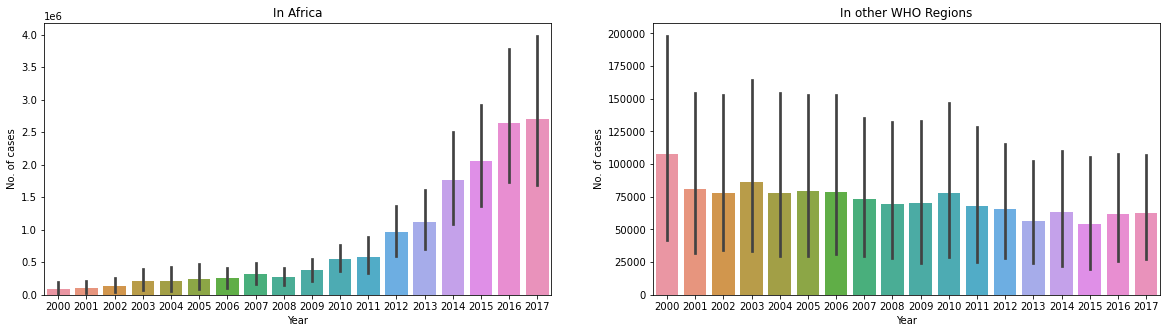

In [9]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1, 2, figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases' , data = rdata[rdata['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases' , data = rdata[rdata['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

In [10]:
estimated = edata.groupby(['WHO Region']).agg({'No. of cases_median' : 'sum'}).reset_index()
x = edata['No. of cases_median'].sum()
estimated['Percentage'] = (estimated['No. of cases_median']/x)*100
estimated

,WHO Region,No. of cases_median,Percentage
0,Africa,1587152540,89.056616
1,Americas,13025802,0.730890
2,Eastern Mediterranean,34456176,1.933368
3,Europe,262,0.000015
4,South-East Asia,132725734,7.447365
5,Western Pacific,14823234,0.831746


Text(0.5, 1.0, 'In other WHO Regions')

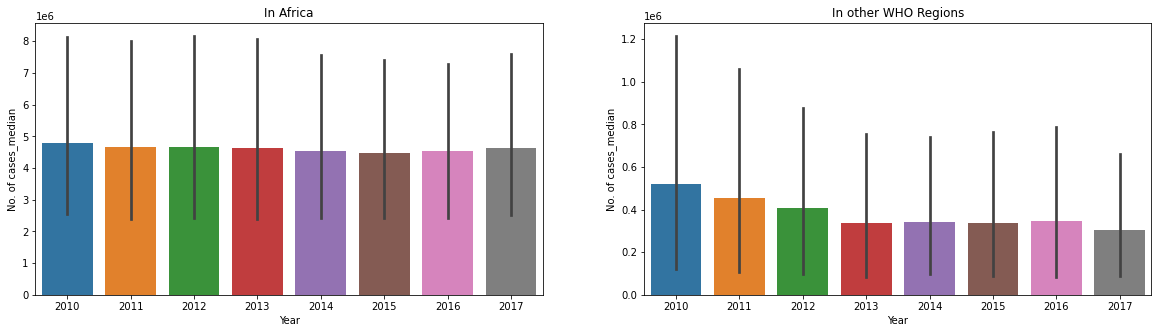

In [11]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1,2 , figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases_median' 
            , data = edata[edata['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases_median' 
            , data = edata[edata['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")

In [12]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       2033 non-null   object 
 1   Year          2033 non-null   int64  
 2   No. of cases  2033 non-null   float64
 3   WHO Region    2033 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 63.7+ KB


In [13]:
incidence = idata.groupby(['WHO Region']).agg({'No. of cases' : 'sum'}).reset_index()
x = idata['No. of cases'].sum()
incidence['Percentage'] = (incidence['No. of cases']/x)*100
incidence

,WHO Region,No. of cases,Percentage
0,Africa,192303.47,86.632035
1,Americas,9666.15,4.354566
2,Eastern Mediterranean,4196.10,1.890328
3,Europe,107.84,0.048582
4,South-East Asia,2824.23,1.272306
5,Western Pacific,12879.53,5.802183


Text(0.5, 1.0, 'In other WHO Regions')

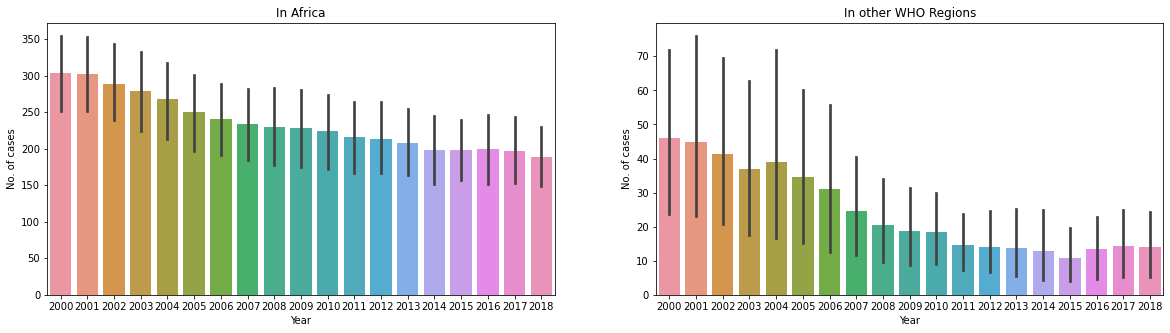

In [14]:
fig_dims = (20, 5)

fig, axes = plt.subplots(1,2 , figsize=fig_dims)
sns.barplot(x = 'Year' , y = 'No. of cases' 
            , data = idata[idata['WHO Region'] == 'Africa'], ax= axes[0]).set_title("In Africa")
sns.barplot(x = 'Year' , y = 'No. of cases' 
            , data = idata[idata['WHO Region'] != 'Africa'], ax= axes[1]).set_title("In other WHO Regions")